# Present Values

## Overview 

This lecture describes the  **present value model** that is a starting point
of much asset pricing theory.

Asset pricing theory is a component of theories about many economic decisions including

  * consumption
  * labor supply
  * education choice 
  * demand for money

In asset pricing theory, and in economic dynamics more generally, a basic topic is the relationship
among different **time series**.

A **time series** is a **sequence** indexed by time.

In this lecture, we'll represent  a sequence as a vector.

So our analysis will typically boil down to studying relationships among vectors.

Our main  tools in this lecture will be  

  * matrix multiplication,  and
  * matrix inversion.

We'll use the calculations described here in  subsequent lectures, including {doc}`consumption smoothing <cons_smooth>`, {doc}`equalizing difference model <equalizing_difference>`, and
{doc}`monetarist theory of price levels <cagan_ree>`.

Let's dive in.

## Analysis 



Let 

 * $\{d_t\}_{t=0}^T $ be a sequence of dividends or "payouts"
 * $\{p_t\}_{t=0}^T $ be a sequence of prices of a claim on the continuation of
    the asset's payout  stream from date $t$ on, namely, $\{d_s\}_{s=t}^T $ 
 * $ \delta  \in (0,1) $ be a one-period "discount factor" 
 * $p_{T+1}^*$ be a terminal price of the asset at time $T+1$
 
We  assume that the dividend stream $\{d_t\}_{t=0}^T $ and the terminal price 
$p_{T+1}^*$ are both exogenous.

This means that they are determined outside the model.

Assume the sequence of asset pricing equations

$$
    p_t = d_t + \delta p_{t+1}, \quad t = 0, 1, \ldots , T
$$ (eq:Euler1)

We say equation**s**, plural, because there are $T+1$ equations, one for each $t =0, 1, \ldots, T$.


Equations {eq}`eq:Euler1` assert that price paid to purchase  the asset at time $t$  equals the payout $d_t$  plus the price at time  $t+1$ multiplied by a time discount factor $\delta$.

Discounting tomorrow's price  by multiplying it by  $\delta$ accounts for the "value of waiting one period".

We want to solve the system of $T+1$ equations {eq}`eq:Euler1` for the asset price sequence  $\{p_t\}_{t=0}^T $ as a function of the dividend sequence $\{d_t\}_{t=0}^T $ and the exogenous terminal
price  $p_{T+1}^*$.

A system of equations like {eq}`eq:Euler1` is an example of a linear  **difference equation**.

There are powerful mathematical  methods available for solving such systems and they are well worth
studying in their own right, being the foundation for the analysis of many interesting economic models.  

For an example, see {doc}`Samuelson multiplier-accelerator <dynam:samuelson>`

In this lecture, we'll  solve system {eq}`eq:Euler1` using matrix multiplication and matrix inversion, basic tools from linear algebra introduced in  {doc}`linear equations and matrix algebra <linear_equations>`.

We will use the following imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Representing sequences as vectors

The equations in system {eq}`eq:Euler1` can be arranged as follows:

$$
\begin{aligned}
    p_0 & = d_0 + \delta p_1 \\
    p_1 & = d_1 + \delta p_2 \\
    \vdots \\
    p_{T-1} & = d_{T-1} + \delta p_T \\
    p_T & = d_T + \delta p^*_{T+1}
\end{aligned}
$$ (eq:Euler_stack)

Write the system {eq}`eq:Euler_stack` of $T+1$ asset pricing  equations as the single matrix equation

$$
    \begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                    0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                    0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                    \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                    0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                    0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
    \begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
    \end{bmatrix} 
    =  \begin{bmatrix}  
    d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
    \end{bmatrix}
    + \begin{bmatrix} 
    0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
    \end{bmatrix}
$$ (eq:pvpieq)

```{exercise-start} 
:label: pv_ex_1
```

Carry out the matrix multiplication in [](eq:pvpieq) by hand and confirm that you
recover the equations in [](eq:Euler_stack).

```{exercise-end}
```

In vector-matrix notation, we can write  system {eq}`eq:pvpieq` as 

$$
    A p = d + b
$$ (eq:apdb)

Here $A$ is the matrix on the left side of equation {eq}`eq:pvpieq`, while

$$
    p = 
    \begin{bmatrix}
        p_0 \\
        p_1 \\
        \vdots \\
        p_T
    \end{bmatrix},
    \quad
    d = 
    \begin{bmatrix}
        d_0 \\
        d_1 \\
        \vdots \\
        d_T
    \end{bmatrix},
    \quad \text{and} \quad
    b = 
    \begin{bmatrix}
        0 \\
        0 \\
        \vdots \\
        p^*_{T+1}
    \end{bmatrix}
$$

The solution for the vector of  prices is  

$$
    p = A^{-1}(d + b)
$$ (eq:apdb_sol)


For example, suppose that  the dividend stream is 

$$
    d_{t+1} = 1.05 d_t, \quad t = 0, 1, \ldots , T-1.
$$

Let's write Python code to compute and plot the dividend stream.

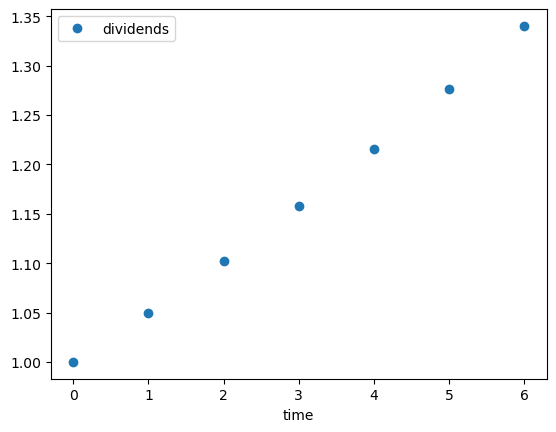

In [2]:
T = 6
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.05 

fig, ax = plt.subplots()
ax.plot(d, 'o', label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()

Now let's compute and plot the asset price.

We set $\delta$ and $p_{T+1}^*$ to

In [3]:
δ = 0.99
p_star = 10.0

Let's build the matrix $A$

In [4]:
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ


Let's inspect $A$

In [5]:
A

array([[ 1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

Now let's solve for prices using {eq}`eq:apdb_sol`.

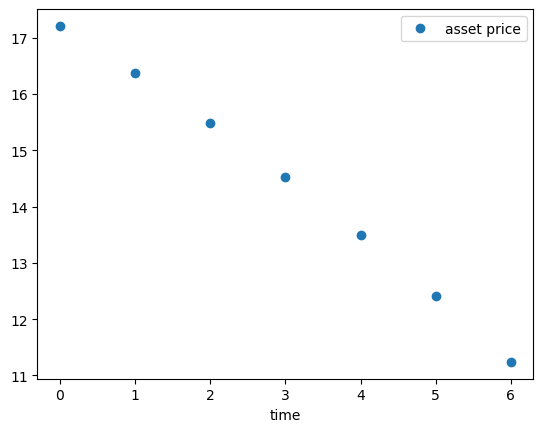

In [6]:
b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)
fig, ax = plt.subplots()
ax.plot(p, 'o', label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()

Now let's consider  a cyclically growing dividend sequence:

$$
    d_{t+1} = 1.01 d_t + 0.1 \sin t, \quad t = 0, 1, \ldots , T-1.
$$

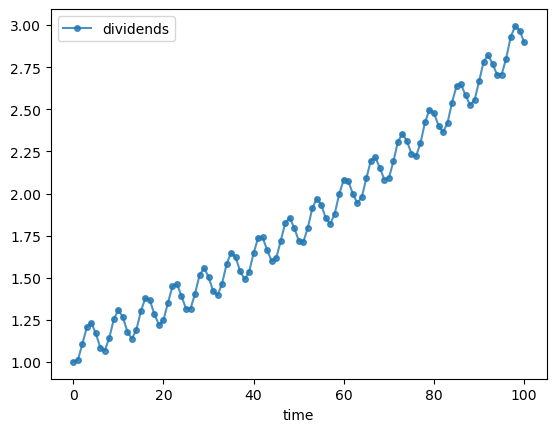

In [7]:
T = 100
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.01 + 0.1 * np.sin(t)

fig, ax = plt.subplots()
ax.plot(d, 'o-', ms=4, alpha=0.8, label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()

```{exercise-start} 
:label: pv_ex_cyc
```

Compute the corresponding asset price sequence when $p^*_{T+1} = 0$ and $\delta
= 0.98$.

```{exercise-end}
```

```{solution-start} pv_ex_cyc
:class: dropdown
```

We proceed as above after modifying parameters and consequently the matrix $A$.

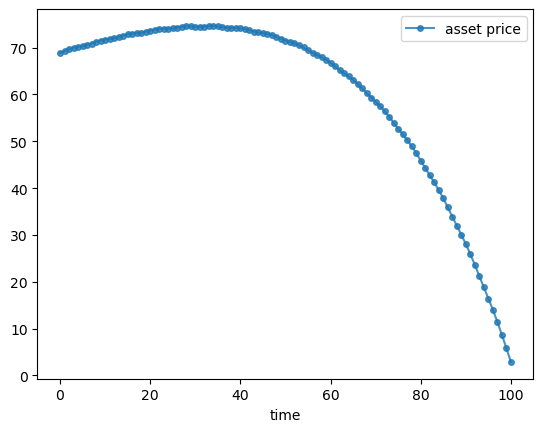

In [8]:
δ = 0.98
p_star = 0.0
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ

b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)
fig, ax = plt.subplots()
ax.plot(p, 'o-', ms=4, alpha=0.8, label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()


The weighted averaging associated with the present value calculation largely
eliminates the cycles.


```{solution-end} 
```

## Analytical expressions

By the [inverse matrix theorem](https://en.wikipedia.org/wiki/Invertible_matrix), a matrix $B$ is the inverse of $A$ whenever $A B$ is the identity.

It can be verified that the  inverse of the matrix $A$ in {eq}`eq:pvpieq` is


$$ A^{-1} = 
    \begin{bmatrix}
        1 & \delta & \delta^2 & \cdots & \delta^{T-1} & \delta^T \cr
        0 & 1 & \delta & \cdots & \delta^{T-2} & \delta^{T-1} \cr
        \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
        0 & 0 & 0 & \cdots & 1  & \delta \cr
        0 & 0 & 0 & \cdots & 0 & 1 \cr
    \end{bmatrix}
$$ (eq:Ainv)



```{exercise-start} 
:label: pv_ex_2
```

Check this by showing that $A A^{-1}$ is equal to the identity matrix.



```{exercise-end}
```


If we use the expression {eq}`eq:Ainv` in {eq}`eq:apdb_sol` and perform the indicated matrix multiplication, we shall find  that

$$
    p_t =  \sum_{s=t}^T \delta^{s-t} d_s +  \delta^{T+1-t} p_{T+1}^*
$$ (eq:ptpveq)

Pricing formula {eq}`eq:ptpveq` asserts that  two components sum to the asset price 
$p_t$:

  * a **fundamental component** $\sum_{s=t}^T \delta^{s-t} d_s$ that equals the **discounted present value** of prospective dividends
  
  * a **bubble component** $\delta^{T+1-t} p_{T+1}^*$
  
The fundamental component is pinned down by the discount factor $\delta$ and the
payout of the asset (in this case,  dividends).

The bubble component is the part of the price that is not pinned down by
fundamentals.

It is sometimes convenient to rewrite the bubble component as

$$ 
c \delta^{-t}
$$

where 

$$ 
c \equiv \delta^{T+1}p_{T+1}^*
$$

## More about bubbles

For a few moments, let's focus on  the special case of an asset that   never pays dividends, in which case

$$
\begin{bmatrix}  
d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
\end{bmatrix} = 
\begin{bmatrix}  
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr 0
\end{bmatrix}
$$

In this case  system {eq}`eq:Euler1` of our $T+1$ asset pricing  equations takes the
form of the single matrix equation

$$
\begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
\begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
\end{bmatrix}  =
\begin{bmatrix} 
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
\end{bmatrix}
$$ (eq:pieq2)

Evidently, if $p_{T+1}^* = 0$, a price vector $p$ of all entries zero
solves this equation and the only the **fundamental** component of our pricing 
formula {eq}`eq:ptpveq` is present. 

But let's activate the **bubble**  component by setting 

$$
p_{T+1}^* = c \delta^{-(T+1)} 
$$ (eq:eqbubbleterm)

for some positive constant $c$.

In this case,  when we multiply both sides of {eq}`eq:pieq2` by
the matrix $A^{-1}$ presented in equation {eq}`eq:Ainv`, we 
 find that

$$
p_t = c \delta^{-t}
$$ (eq:bubble)


## Gross rate of return

Define the gross rate of return on holding the asset from period $t$ to period $t+1$
as 

$$
R_t = \frac{p_{t+1}}{p_t}
$$ (eq:rateofreturn)

Substituting equation {eq}`eq:bubble` into equation {eq}`eq:rateofreturn` confirms that an asset whose  sole source of value is a bubble  earns a  gross rate of return

$$
R_t = \delta^{-1} > 1 , t = 0, 1, \ldots, T
$$


## Exercises


```{exercise-start} 
:label: pv_ex_a
```

Give analytical expressions for an asset price $p_t$ under the 
following settings for $d$ and $p_{T+1}^*$:

1. $p_{T+1}^* = 0, d_t = g^t d_0$ (a modified version of the Gordon growth formula)
1. $p_{T+1}^* = g^{T+1} d_0,  d_t = g^t d_0$ (the plain vanilla  Gordon growth formula)
1. $p_{T+1}^* = 0, d_t = 0$ (price of a worthless stock)
1. $p_{T+1}^* = c \delta^{-(T+1)}, d_t = 0$ (price of a pure bubble stock)


```{exercise-end} 
```

```{solution-start} pv_ex_a
:class: dropdown
```

Plugging each pair of the above $p_{T+1}^*, d_t$ into Equation {eq}`eq:ptpveq` yields:

1. $p_t = \sum^T_{s=t} \delta^{s-t} g^s d_0$
1. $p_t = \sum^T_{s=t} \delta^{s-t} g^s d_0 + \delta^{T+1-t} g^{T+1} d_0$
1. $p_t = 0$
1. $p_t = c \delta^{-t}$


```{solution-end}
```